# EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('clean.csv',index_col=[0])
df.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,55,Undergraduates,Single,58138.0,0,0,2012-09-04,58,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,60,Undergraduates,Single,46344.0,1,1,2014-03-08,38,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,48,Undergraduates,Partnered,71613.0,0,0,2013-08-21,26,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,30,Undergraduates,Partnered,26646.0,1,0,2014-02-10,26,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,33,Doctorates,Partnered,58293.0,1,0,2014-01-19,94,...,3,6,5,0,0,0,0,0,0,0


## Characteristic/Pattern of the Customer with the Highest Total_Spent amount

It is necessary to understand the pattern of the top spending customer for the last 2 years to effectively identify certain customer segments to target for generating profit growth for the company by attracting more of the customers within the segment, increasing customer loyalty, or encouraging the customer to spend more money.

In [3]:
df['Total_Spent'].describe()

count    2236.000000
mean      605.986583
std       601.865156
min         5.000000
25%        69.000000
50%       396.500000
75%      1045.500000
max      2525.000000
Name: Total_Spent, dtype: float64

The customer data then filtered to only include customers with the Total_Spent amount higher than the third quartile (Q3) of the Total_Spent, resulted in the data of the top 25% spenders in the last 2 years.

In [4]:
# pd.set_option('display.max_columns', None)
top25spender = df[df['Total_Spent'] > df['Total_Spent'].quantile(0.75)]
top25spender.describe()

,ID,Year_Birth,Age,Income,Kidhome,Teenhome,Recency,Total_Spent,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,...,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,5601.105546,1968.012522,44.894454,75052.644007,0.062612,0.316637,49.976744,1489.826476,739.245081,61.964222,...,5.908766,8.486583,3.620751,0.093023,0.164580,0.266547,0.200358,0.042934,0.003578,0.300537
std,3158.020131,12.737979,12.767761,12420.696951,0.242480,0.499023,29.086655,329.247252,303.344273,50.132536,...,2.898012,2.847891,2.259032,0.290725,0.371133,0.442550,0.400627,0.202889,0.059761,0.458902
min,0.000000,1941.000000,17.000000,2447.000000,0.000000,0.000000,0.000000,1047.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2928.000000,1958.000000,36.000000,67939.000000,0.000000,0.000000,25.000000,1198.000000,507.500000,21.500000,...,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5453.000000,1969.000000,44.000000,75236.000000,0.000000,0.000000,53.000000,1440.000000,736.000000,50.000000,...,6.000000,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8451.000000,1977.000000,55.000000,81952.000000,0.000000,1.000000,74.500000,1690.500000,962.000000,93.000000,...,7.000000,11.000000,5.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,11112.000000,1995.000000,72.000000,160803.000000,1.000000,2.000000,99.000000,2525.000000,1493.000000,199.000000,...,28.000000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
top25spender

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,55,Undergraduates,Single,58138.0,0,0,2012-09-04,58,...,10,4,7,0,0,0,0,0,0,1
12,2125,1959,54,Undergraduates,Single,63033.0,0,0,2013-11-15,82,...,4,8,2,0,0,0,0,0,0,0
15,2114,1946,66,Doctorates,Single,82800.0,0,0,2012-11-24,23,...,6,12,3,0,0,1,1,0,0,1
18,6565,1949,64,Masters,Partnered,76995.0,0,1,2013-03-28,91,...,4,9,5,0,0,0,1,0,0,0
21,5376,1979,34,Undergraduates,Partnered,2447.0,1,0,2013-01-06,42,...,28,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,7366,1982,31,Masters,Single,75777.0,0,0,2013-07-04,12,...,6,11,1,0,1,1,0,0,0,1
2228,8720,1978,34,Masters,Partnered,51381.5,0,0,2012-08-12,53,...,0,1,0,0,1,0,0,0,0,0
2231,9817,1970,42,Masters,Single,44802.0,0,0,2012-08-21,71,...,4,12,8,0,0,0,0,0,0,0
2235,10870,1967,46,Undergraduates,Partnered,61223.0,0,1,2013-06-13,46,...,3,4,5,0,0,0,0,0,0,0


### Top 25% Spenders in terms of Age

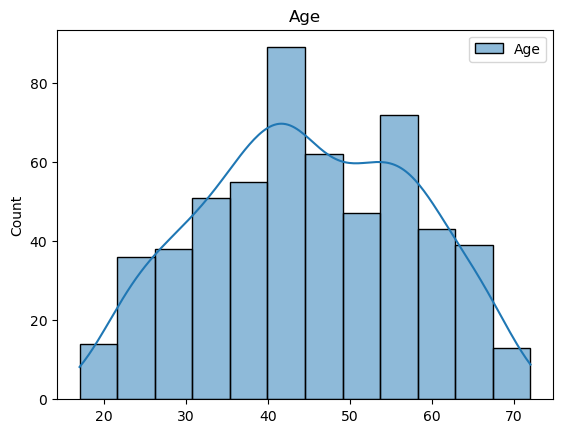

,Age
count,559.000000
mean,44.894454
std,12.767761
min,17.000000
25%,36.000000
50%,44.000000
75%,55.000000
max,72.000000


In [6]:
hist = top25spender[['Age']]

sns.histplot(hist, kde=True)
plt.title('Age')
plt.show()

hist.describe()

In [7]:
stats, pval=normaltest(hist)

if pval<=0.05:
    print('Non-Normal Distribution')
else: 
    print('Normal Distribution')

Non-Normal Distribution


Based on the information above, the top 25% of spenders mostly consist of people between the age of 36-55 using the IQR range as the data centered around median value.

### Top 25% Spenders in terms of Product Purchased

In [8]:
products = top25spender[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

for i in products.columns :
    stats, pval=normaltest(products[i])
    if pval<=0.05:
        print(f'{i} = Non-Normal Distribution')
    else: 
        print(f'{i} = Normal Distribution')

MntWines = Non-Normal Distribution
MntFruits = Non-Normal Distribution
MntMeatProducts = Non-Normal Distribution
MntFishProducts = Non-Normal Distribution
MntSweetProducts = Non-Normal Distribution
MntGoldProds = Non-Normal Distribution


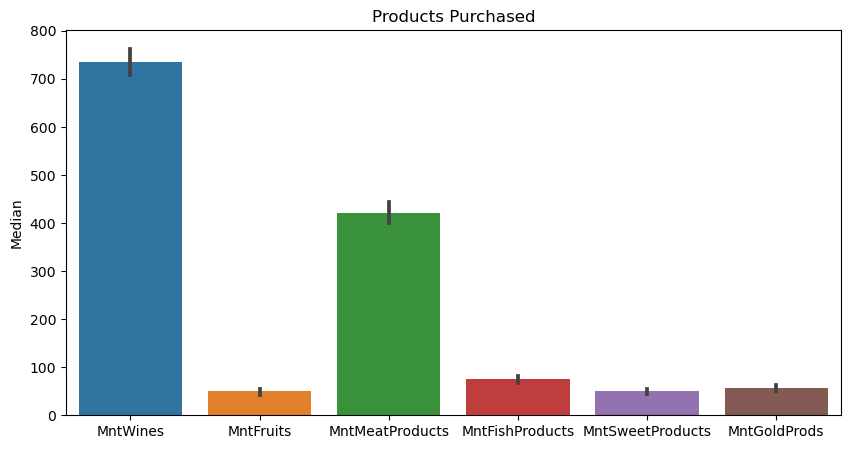

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(products,estimator=np.median )
plt.ylabel('Median')
plt.title('Products Purchased')
plt.show()

Based on the information above, the top 25% of spenders mostly spend their money on wine products and meat products.

### Top 25% Spenders in Education Level

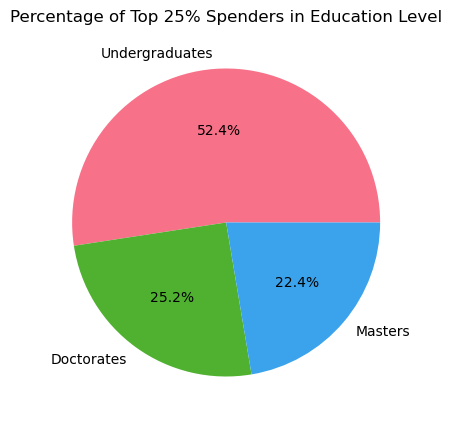

In [10]:
piechart = top25spender['Education']
fig = plt.figure(figsize=(5,5))
labels = piechart.unique()
data = piechart.value_counts(normalize=True)

plt.pie(data, labels=labels, colors=sns.color_palette("husl", 3), autopct='%.1f%%' )
plt.title('Percentage of Top 25% Spenders in Education Level')
plt.show()


From information above, we can conclude that the highest spender in the supermarket consist of people with undergraduate degree or higher education level, dominated by people with undergraduate degree with over 50% percentage.

### Top 25% Spenders in Income level

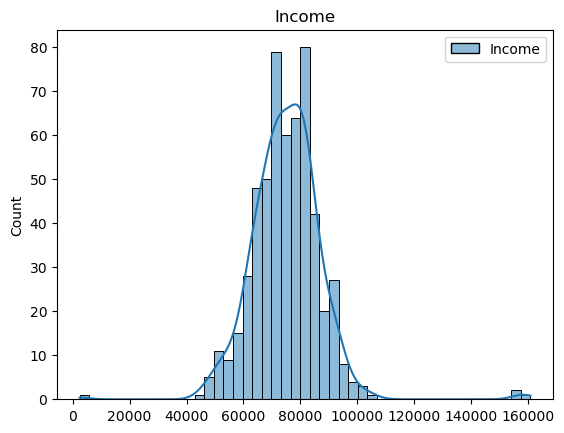

,Income
count,559.000000
mean,75052.644007
std,12420.696951
min,2447.000000
25%,67939.000000
50%,75236.000000
75%,81952.000000
max,160803.000000


In [11]:
income = top25spender[['Income']]

sns.histplot(income, kde=True)
plt.title('Income')
plt.show()

income.describe()

Based on the information above, the top 25% of spenders mostly consist of people with an income of around 67.939 to 81.952 per year using the IQR range.

### Top 25% Spenders in Marital Status

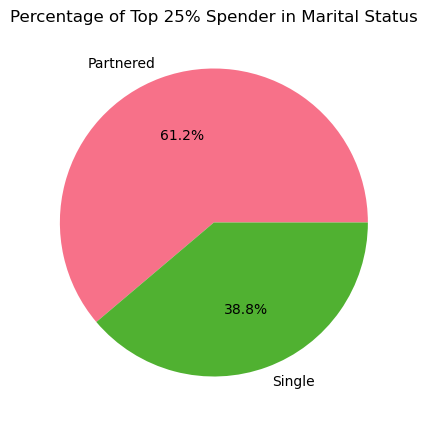

In [12]:
piechart = top25spender['Marital_Status']
fig = plt.figure(figsize=(5,5))
labels = ['Partnered','Single']
data = piechart.value_counts(normalize=True)

plt.pie(data, labels=labels, colors=sns.color_palette("husl", 3), autopct='%.1f%%' )
plt.title('Percentage of Top 25% Spender in Marital Status')
plt.show()

In [13]:
piechart.value_counts()

Marital_Status
Partnered    342
Single       217
Name: count, dtype: int64

Based on the information above, the top 25% of spenders mostly consist of people who are married / live together.

### Top 25% Spenders in Transactional Channel

In [14]:
channel = top25spender[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]

for i in channel.columns :
    stats, pval=normaltest(channel[i])
    if pval<=0.05:
        print(f'{i} = Non-Normal Distribution')
    else: 
        print(f'{i} = Normal Distribution')

NumWebPurchases = Non-Normal Distribution
NumCatalogPurchases = Non-Normal Distribution
NumStorePurchases = Non-Normal Distribution


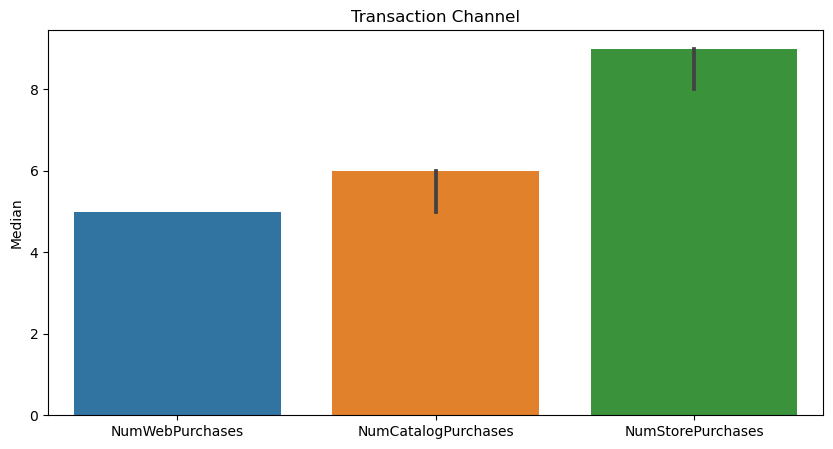

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(channel,estimator=np.median )
plt.ylabel('Median')
plt.title('Transaction Channel')
plt.show()

Based on the information above, the top 25% spenders prefer in-store shopping compared to catalog or online channels.

# Conclusion

Based on the data provided, the pattern found within the top 25% of spenders in the supermarkets over the last 2 years are as follows :
* Age 36-55
* Married or living together with a partner
* Spent most of their money on Wine and Meat products
* Yearly income of around 67.939 to 81.952 USD
* Completed a minimum of undergraduate degree education level
* Prefers in-store shopping

There are particular characteristics of this customer segment that could be leveraged to increase company profits, such as :
* Age 36-55
    * Established in career and having more disposable income
    * Prioritize quality and long-term investments
* Married or living together with a partner
    * Share financial responsibilities and prioritize convenience
    * Seek purchases that benefit the household and value joint decision-making.
    * View shopping together as bonding time.
* Spent most of their money on Wine and Meat products
    * Prefer indulgent, high-quality food experiences
    * Likely to value social dining
* Yearly income of around 67.939 to 81.952 USD
    * Considered as above average income (US average income in 2024 - 63,795 USD)
    * Seek value and quality, more open to premium offerings
* Completed a minimum of undergraduate degree education level
    * Higher earning potential
    * Seek sophistication and intellectual stimulation
* Prefers in-store shopping
    * Value tactile experiences and personal interaction
    * Enjoy the social aspect and convenience of physical browsing

Therefore, actionable steps that could be taken considering the segment characteristics above are as follows :
* Dedicate sections for premium wine and meat products.
    * The reasonings related to the characteristics of the customer segment are as follows :
        * Age 36-55: Appeals to their preference for a high-quality product
        * Married / Living together: Offers convenience and provides high-quality ingredients for shared meals and special occasions.
        * Spent most on Wine and Meat products: Provide a premium selection of their favorite products.
        * Yearly income $67,939 to $81,952: Provides options that align with their purchasing power and preferences for value and quality in their purchases.
        * Completed undergraduate degree: Caters to their refined tastes and appreciation for sophistication.
        * Prefers in-store shopping: Enhances the in-store experience and provides opportunities to explore and select high-quality products in person.
    * Assumption : 10% increase in sales of premium products due to dedicated sections and premium products contribute to 3% of total sales (10%*3%=0.3%)
        * Estimated 0.3% increase in total revenue
* Host workshops on wine appreciation and gourmet cooking, and partner with experts to offer interactive, in-store events for a social and educational experience.
    * The reasonings related to the characteristics of the customer segment are as follows :
        * Age 36-55: Provide opportunities to enhance culinary skills and explore new tastes, aligned with preferences for quality dining experiences.
        * Married / Living together: Provide opportunities for shared experiences and bonding.
        * Spent most on Wine and Meat products: Provide opportunities for customers to engage with products they frequently purchase and enhance their enjoyment of them.
        * Yearly income $67,939 to $81,952: Provides opportunities to learn the value-added benefits that justify their spending on quality products
        * Completed undergraduate degree: Appeals to their intellectual curiosity  
        * Prefers in-store shopping: Encourage customers to make in-store visits and create a sense of excitement and community engagement.
    * Assumption : 10% increase in sales of event-related products during or after the events and products contribute to 5% of total sales (10%*5%=0.5%)
        * Estimated 0.5% increase in total revenue
